In the below cell we are imorting panads module and reading data as DataFrame.
Then we are droping the rows with null values

In [ ]:
import pandas as pd
df=pd.read_csv("beer_reviews.csv")
df=df.dropna()

Which brewery produces the strongest beers by ABV%?
We have grouped the data by "brewery_name" and then took the mean of beer_abv and get the brewery name which has highest percentage of beer_abv in mean.

In [46]:
##   question 1 ##
print("Brewery produces the sytongest beers by ABV% :",df.groupby("brewery_name")["beer_abv"].mean().idxmax())

Brewery produces the sytongest beers by ABV% : Schorschbräu


If you had to pick 3 beers to recommend using only this data, which would you pick? 
To recommand the beers, I will select all the beers which got 5 rating in all review_aroma,
review_appearance, review_taste, review_palate, review_overall. Then first beer to recommend 
is with minimum ABV % and Second is with mean ABV% and Third is with maximum ABV%. 

In [47]:
########### question 2 #########
df2=df[(df["review_aroma"]==df["review_aroma"].max()) & (df["review_appearance"]==df["review_appearance"].max())  & (df["review_overall"]==df["review_overall"].max())  & (df["review_palate"]==df["review_palate"].max())  & (df["review_taste"]==df["review_taste"].max())]
print("First beer to recommend :",df2[df2["beer_abv"]==df2["beer_abv"].min()].groupby("beer_name")["beer_abv"].count().idxmax())
print("Second beer to recommend :",df2[df2["beer_abv"]==round(df2["beer_abv"].mean())].groupby("beer_name")["beer_abv"].count().idxmax())
print("Third beer to recommend :",df2[df2["beer_abv"]==df2["beer_abv"].max()].groupby("beer_name")["beer_abv"].count().idxmax())

First beer to recommend : Erdinger Weissbier Alkoholfrei
Second beer to recommend : Old Rasputin Russian Imperial Stout
Third beer to recommend : Sink The Bismarck!


Which of the factors (aroma, taste, appearance, palette) are most important in
determining the overall quality of a beer? To check the importance for factors in determining the overall quality of a beer, we apply XGBRegressor model and gives us feature importance.
It gives us graph showing importance of factors.

C:\Users\hp-pc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.6655738482040509
0.6647165130717322


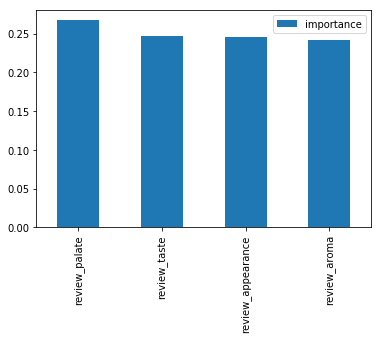

In [48]:
###### question 3 ######
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
features=["review_aroma","review_appearance","review_taste","review_palate"]
train_x, test_x, train_y, test_y = train_test_split(df[features], df["review_overall"],
                                                        train_size=.75)
trained_model = XGBRegressor(n_estimators=500, n_jobs=-1, learning_rate=0.3)
trained_model.fit(train_x, train_y)
predictions = trained_model.predict(test_x)
print(trained_model.score(train_x,train_y))
print(trained_model.score(test_x,test_y))
pd.DataFrame(trained_model.feature_importances_, index = train_x.columns, columns=['importance']).sort_values('importance',ascending=False).plot(kind="bar")    

Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style
should I try? To suggest a beer style based on aroma and appearance, We have select all observations with maximum rating for aroma and appearance and select the beer style which got maximum number of reviews.

In [50]:
####### question 4 #######
df4=df[(df["review_aroma"]==df["review_aroma"].max()) & (df["review_appearance"]==df["review_appearance"].max())]
print("You should try :",df4.groupby('beer_style')["beer_style"].count().idxmax())

You should try : American Double / Imperial Stout
